In [1]:
##############
#### 
### Expert request
###############

In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
username = ''
user_password = ''

cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database='football_data_qeura'
)


cursor = cnx.cursor()

query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'football_data_qeura'"
cursor.execute(query)


results = cursor.fetchall()

# Loop through the table names and create DataFrames for each table
dfs = {}
for row in results:
    table_name = row[0]
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)
    dfs[table_name] = df
cursor.close()
cnx.close()


for table_name, df in dfs.items():
    print(f"Table Name: {table_name}")
   # print(df)
  #  print()


C:\Users\mehrs\AppData\Local\Temp\ipykernel_11568\1627757975.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)


Table Name: clubs
Table Name: clubs_season
Table Name: competitions
Table Name: national
Table Name: players
Table Name: players_season
Table Name: transfers


In [7]:

transfer_merged = dfs['transfers'].merge(dfs['clubs'], left_on='destination_club_id', right_on='id')
transfer_merged = transfer_merged[['destination_club_id','fee','season_x','market_value']]

transfer_merged = transfer_merged[transfer_merged['season_x'] > 2017]
transfer_merged = transfer_merged[transfer_merged['season_x'] < 2023]
transfer_merged = transfer_merged[transfer_merged['fee'] > 0]
transfer_merged = pd.merge(transfer_merged,dfs['clubs'],left_on='destination_club_id',right_on='id')
transfer_merged = transfer_merged[['name','fee','season_x','market_value']]


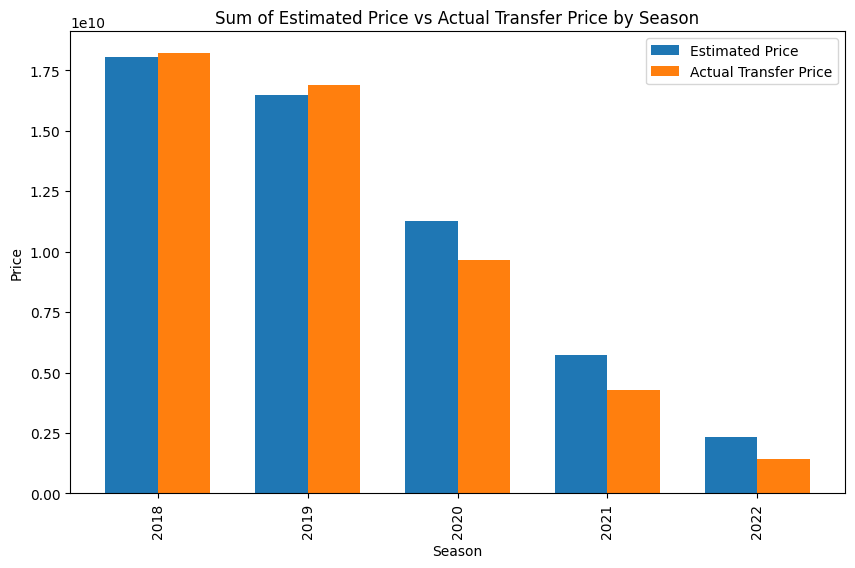

In [8]:

sum_estimated_price = transfer_merged.groupby('season_x')['market_value'].sum()
sum_actual_price = transfer_merged.groupby('season_x')['fee'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(sum_estimated_price))
ax.bar(x, sum_estimated_price, width=bar_width, label='Estimated Price')
ax.bar([i + bar_width for i in x], sum_actual_price, width=bar_width, label='Actual Transfer Price')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(sum_estimated_price.index)
ax.set_xlabel('Season')
ax.set_ylabel('Price')
ax.set_title('Sum of Estimated Price vs Actual Transfer Price by Season')
ax.legend()
plt.xticks(rotation=90)
plt.show()


In [9]:
summary_df = pd.DataFrame({'Estimated Price': sum_estimated_price, 'Actual Transfer Price': sum_actual_price})
summary_df['ratio'] = summary_df['Estimated Price'] / summary_df['Actual Transfer Price']
summary_df

,Estimated Price,Actual Transfer Price,ratio
season_x,,,
2018,1.805512e+10,1.819060e+10,0.992552
2019,1.649150e+10,1.688255e+10,0.976837
2020,1.128070e+10,9.635199e+09,1.170780
2021,5.705250e+09,4.280951e+09,1.332706
2022,2.341250e+09,1.442895e+09,1.622606
